In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
diabetes = pd.read_csv('diabetes.csv')
#data_clear = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#diabetes = diabetes[(diabetes[data_clear] != 0).all(axis=1)]
diabetes.head() 
M=len(diabetes)
M


768

In [4]:
cancer = pd.read_csv('cancer.csv')
cancer.head() 
N=len(cancer)
N

569

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
iterations = 1000
learning_rate = 0.01

In [8]:
diabetes_reg = diabetes[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
data_diabetes=diabetes_reg[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


train_diabetes, eval_diabetes = train_test_split(data_diabetes, test_size=0.2, random_state=42)

In [9]:
cancer.replace({'M': 1, 'B': 0}, inplace=True)
cancer_reg = cancer[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
data_cancer=cancer_reg[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

train_cancer, eval_cancer = train_test_split(data_cancer, test_size=0.2, random_state=42)


In [10]:
def standardize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_std = (X - mu) / sigma
    return X_std

In [11]:
XDt=train_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
XDt=(XDt-XDt.mean())/XDt.std()
XDt=XDt.values
XDt=standardize(XDt)
XDe=eval_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
XDe=(XDe-XDe.mean())/XDe.std()
XDe=XDe.values
XDe=standardize(XDe)

In [12]:
XCt=train_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
XCt=(XCt-XCt.mean())/XCt.std()
XCt=XCt.values
XCt=standardize(XCt)
XCe=eval_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
XCe=(XCe-XCe.mean())/XCe.std()
XCe=XCe.values
XCe=standardize(XCe)

In [13]:
YDt = train_diabetes[['Outcome']]
YDt=YDt.values
YDe = eval_diabetes[['Outcome']]
YDe=YDe.values
YCt = train_cancer[['diagnosis']]
YCt=YCt.values
YCe = eval_cancer[['diagnosis']]
YCe=YCe.values

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predicted_y(theta, x, intercept):
    y_lst = []
    for i in range(len(x)):
        y_lst.append(sigmoid(theta @ x[i] + intercept))
    return np.array(y_lst)

def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

def accuracy(y, y_predicted):
    y_pred_class = np.round(y_predicted)
    return np.mean(y == y_pred_class)

def precision(y, y_predicted):
    y_pred_class = np.round(y_predicted)
    true_positive = np.sum((y == 1) & (y_pred_class == 1))
    predicted_positive = np.sum(y_pred_class == 1)
    return true_positive / predicted_positive if predicted_positive != 0 else 0

def recall(y, y_predicted):
    y_pred_class = np.round(y_predicted)
    true_positive = np.sum((y == 1) & (y_pred_class == 1))
    actual_positive = np.sum(y == 1)
    return true_positive / actual_positive if actual_positive != 0 else 0

def f1_score(y, y_predicted):
    prec = precision(y, y_predicted)
    rec = recall(y, y_predicted)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0

def dldt(x, y, y_predicted):
    s = 0
    n = len(y)
    for i in range(n):
        s += -x[i] * (y[i] - y_predicted[i])
    return (2 / n) * s

def dldb(y, y_predicted):
    n = len(y)
    s = 0
    for i in range(len(y)):
        s += -(y[i] - y_predicted[i])
    return (2 / n) * s

def gradient_descent(x, y, learning_rate, iterations):
    theta_vector = np.zeros(x.shape[1])
    intercept = 0
    n = len(x)
    logistic_loss = []

    for i in range(iterations):
        y_predicted = predicted_y(theta_vector, x, intercept)

        theta_vector = theta_vector - learning_rate * dldt(x, y, y_predicted)
        intercept = intercept - learning_rate * dldb(y, y_predicted)
        logistic_loss.append(loss(y, y_predicted))

    return theta_vector, intercept, logistic_loss

In [15]:
tD,bD,lD=gradient_descent(XDt,YDt,learning_rate,iterations)

In [16]:
print("theta:",tD)
print("bias:",bD)

theta: [ 0.21426887  0.9409237  -0.17708245  0.01021747 -0.11207294  0.67583647
  0.22328004  0.38927518]
bias: [-0.80206874]


In [17]:
def predictBinary(inp, t, b):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(t@inp[i]+b)
    y_lst = np.array(y_lst)
    y_binary_lst=(y_lst >= 0.5).astype(int)
    return y_binary_lst

In [18]:
YDp=predictBinary(XDe, tD, bD)

In [19]:
def lossComp(y, y_predicted, iterations, linear_loss):
    experimental_loss=[]
    experimental_accuracy = []
    for i in range(iterations):
        experimental_loss.append(loss(y,y_predicted))
        experimental_accuracy.append(accuracy(y, y_predicted))
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Number of iterations')
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(np.arange(1, iterations + 1), linear_loss, color='tab:red', label='Linear Loss')
    ax1.plot(np.arange(1, iterations + 1), experimental_loss, color='tab:orange', label='Experimental Loss')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', color='tab:blue')
    ax2.plot(np.arange(1, iterations + 1), experimental_accuracy, color='tab:blue', label='Experimental Accuracy')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()
    plt.show()

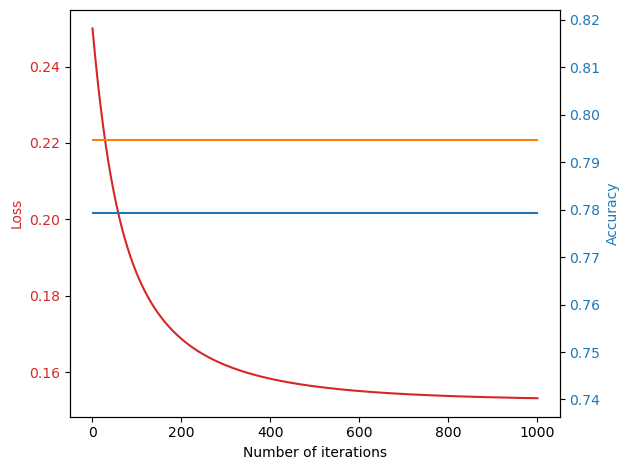

In [20]:
lossComp(YDe, YDp, iterations, lD)

In [21]:
accuracy(YDe, YDp)

0.7792207792207793

In [22]:
precision(YDe, YDp)

0.8

In [23]:
recall(YDe, YDp)

0.509090909090909

In [24]:
f1_score(YDe, YDp)

0.6222222222222221

In [25]:
cnf_matrix_diabetes = metrics.confusion_matrix(YDe, YDp)
cnf_matrix_diabetes

array([[92,  7],
       [27, 28]], dtype=int64)

In [26]:
tC,bC,lC=gradient_descent(XCt,YCt,learning_rate,iterations)

In [27]:
print("theta:",tC)
print("bias:",bC)

theta: [ 0.44009199  0.46675806  0.43281922  0.44375244  0.17294984  0.08886195
  0.36125589  0.48900697  0.0856734  -0.19939592  0.44338408  0.01330636
  0.35280341  0.38447448  0.03530259 -0.20723139 -0.1129312   0.04673321
 -0.11580995 -0.26799379  0.5477442   0.59204031  0.51267846  0.52113734
  0.40125453  0.21388045  0.37133621  0.48701102  0.41438064  0.10447677]
bias: [-0.44526719]


In [28]:
YCp=predictBinary(XCe, tC, bC)

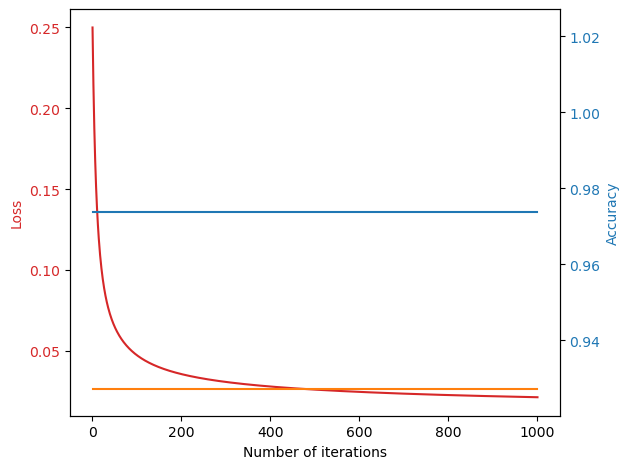

In [29]:
lossComp(YCe, YCp, iterations, lC)

In [30]:
accuracy(YCe, YCp)

0.9736842105263158

In [31]:
precision(YCe, YCp)

1.0

In [32]:
recall(YCe, YCp)

0.9302325581395349

In [33]:
f1_score(YCe, YCp)

0.963855421686747

In [34]:
cnf_matrix_cancer = metrics.confusion_matrix(YCe, YCp)
cnf_matrix_cancer

array([[71,  0],
       [ 3, 40]], dtype=int64)

In [35]:
def lossRidge(y,y_predicted,theta,Lambda):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    Ridge = Lambda * sum(t**2 for t in theta)
    
    return (1/n)*s + Ridge

In [36]:
def gradient_descentRidge(x,y,learning_rate,iterations):
    theta_vector=np.zeros(x.shape[1])
    intercept=0
    n = len(x)
    linear_loss=[]
    Lambda = 0.01

    for i in range(iterations):
        
        
        y_predicted = predicted_y(theta_vector,x,intercept)
        
        theta_vector = theta_vector - learning_rate *dldt(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(lossRidge(y,y_predicted,theta_vector,Lambda))
    
    return theta_vector,intercept, linear_loss

In [37]:
tCW,bCW,lCW=gradient_descentRidge(XCt,YCt,learning_rate,iterations)

In [38]:
print("theta:",tC)
print("bias:",bC)

theta: [ 0.44009199  0.46675806  0.43281922  0.44375244  0.17294984  0.08886195
  0.36125589  0.48900697  0.0856734  -0.19939592  0.44338408  0.01330636
  0.35280341  0.38447448  0.03530259 -0.20723139 -0.1129312   0.04673321
 -0.11580995 -0.26799379  0.5477442   0.59204031  0.51267846  0.52113734
  0.40125453  0.21388045  0.37133621  0.48701102  0.41438064  0.10447677]
bias: [-0.44526719]


In [39]:
YCWp=predictBinary(XCe, tCW, bCW)

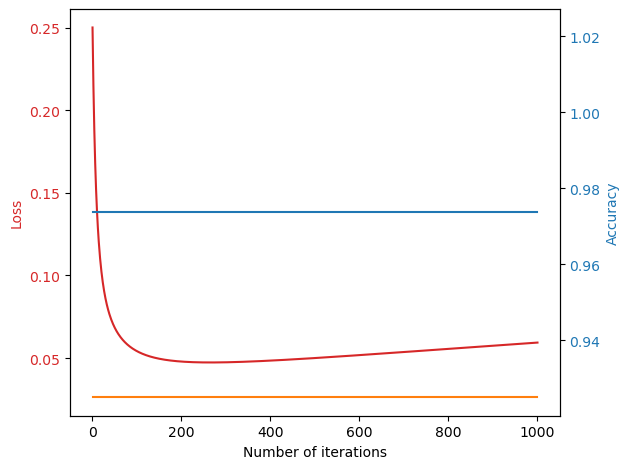

In [40]:
lossComp(YCe, YCWp, iterations, lCW)

In [41]:
accuracy(YCe, YCWp), accuracy(YCe, YCp)

(0.9736842105263158, 0.9736842105263158)

In [42]:
precision(YCe, YCWp), precision(YCe, YCp)

(1.0, 1.0)

In [43]:
recall(YCe, YCWp), recall(YCe, YCp)

(0.9302325581395349, 0.9302325581395349)

In [44]:
f1_score(YCe, YCWp), f1_score(YCe, YCp)

(0.963855421686747, 0.963855421686747)

In [45]:
cnf_matrix_cancer_weights = metrics.confusion_matrix(YCe, YCWp)
cnf_matrix_cancer_weights

array([[71,  0],
       [ 3, 40]], dtype=int64)

In [46]:
np.ravel(YCt)
XCt

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(XCt, np.ravel(YCt))

GaussianNB()

In [48]:
YCBp = gnb.predict(XCe)
YCBp = YCBp.reshape(-1, 1)

In [49]:
accuracy(YCe, YCBp), accuracy(YCe, YCWp), accuracy(YCe, YCp)

(0.956140350877193, 0.9736842105263158, 0.9736842105263158)

In [50]:
precision(YCe, YCBp), precision(YCe, YCWp), precision(YCe, YCp)

(0.975, 1.0, 1.0)

In [51]:
recall(YCe, YCBp), recall(YCe, YCWp), recall(YCe, YCp)

(0.9069767441860465, 0.9302325581395349, 0.9302325581395349)

In [52]:
f1_score(YCe, YCBp), f1_score(YCe, YCWp), f1_score(YCe, YCp)

(0.9397590361445783, 0.963855421686747, 0.963855421686747)

In [53]:
cnf_matrix_cancer_weights = metrics.confusion_matrix(YCe, YCBp)
cnf_matrix_cancer_weights

array([[70,  1],
       [ 4, 39]], dtype=int64)

In [54]:
def apply_pca(x, k):
    pca = PCA(n_components=k)
    return pca.fit_transform(x), pca

def generate_k_values(max_value):
    return list(range(1, max_value + 1))

def train_k_values(x, y, learning_rate, iterations, k_values):
    best_k = None
    best_accuracy = 0
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for k in k_values:
        x_pca, pca = apply_pca(x, k)
        theta, intercept, _ = gradient_descent(x_pca, y, learning_rate, iterations)
        y_pred = predicted_y(theta, x_pca, intercept)
        acc = accuracy(y, y_pred)
        prec = precision(y, y_pred)
        rec = recall(y, y_pred)
        f1 = f1_score(y, y_pred)
        accuracy_scores.append(acc)
        precision_scores.append(prec)
        recall_scores.append(rec)
        f1_scores.append(f1)
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_k = k
    
    return best_k, best_accuracy, np.array(accuracy_scores), np.array(precision_scores), np.array(recall_scores), np.array(f1_scores)


In [55]:
k_values = generate_k_values(XCt.shape[1])
best_k, best_accuracy, accuracy_scores, precision_scores, recall_scores, f1_scores = train_k_values(XCt, YCt, learning_rate, iterations, k_values)

In [56]:
best_k

11

In [57]:
best_accuracy, accuracy(YCe, YCBp), accuracy(YCe, YCWp), accuracy(YCe, YCp)

(0.9824175824175824, 0.956140350877193, 0.9736842105263158, 0.9736842105263158)

In [58]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

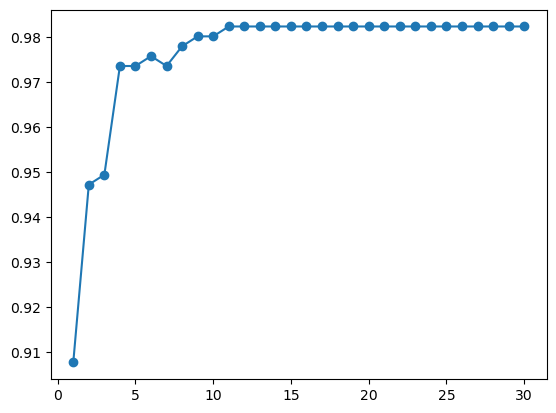

In [59]:
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')

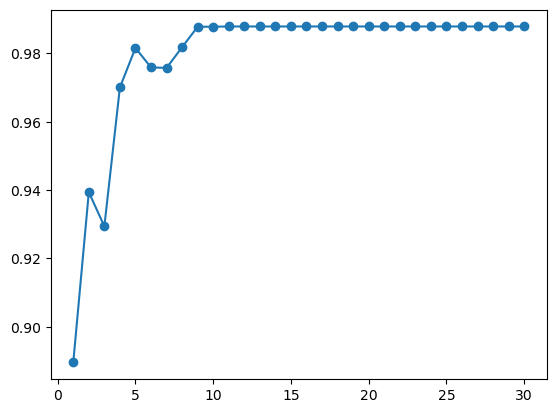

In [60]:
plt.plot(k_values, precision_scores, label='Precision', marker='o')

In [61]:
precision(YCe, YCBp), precision(YCe, YCWp), precision(YCe, YCp)

(0.975, 1.0, 1.0)

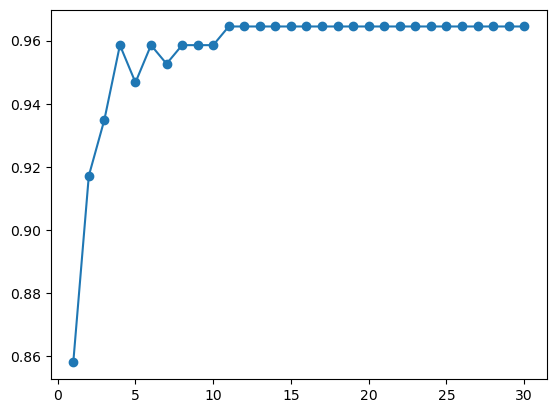

In [62]:
plt.plot(k_values, recall_scores, label='Recall', marker='o')

In [63]:
recall(YCe, YCBp), recall(YCe, YCWp), recall(YCe, YCp)

(0.9069767441860465, 0.9302325581395349, 0.9302325581395349)

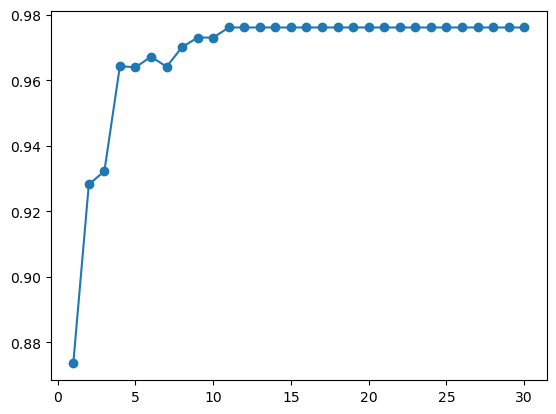

In [64]:
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')

In [65]:
f1_score(YCe, YCBp), f1_score(YCe, YCWp), f1_score(YCe, YCp)

(0.9397590361445783, 0.963855421686747, 0.963855421686747)

In [66]:
k_values = generate_k_values(XDt.shape[1])
best_k, best_accuracy, accuracy_scores, precision_scores, recall_scores, f1_scores = train_k_values(XDt, YDt, learning_rate, iterations, k_values)

In [67]:
best_k

6

In [68]:
best_accuracy

0.7687296416938111

In [69]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

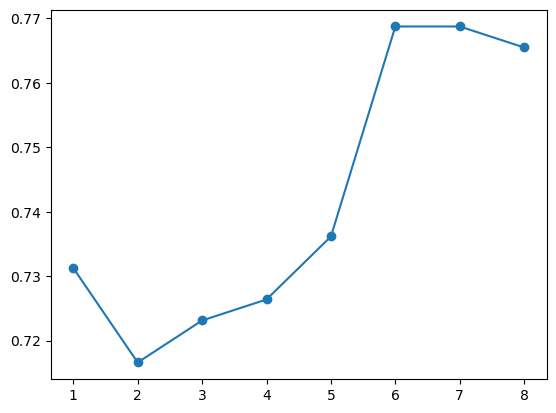

In [70]:
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')

In [71]:
accuracy(YDe, YDp)

0.7792207792207793

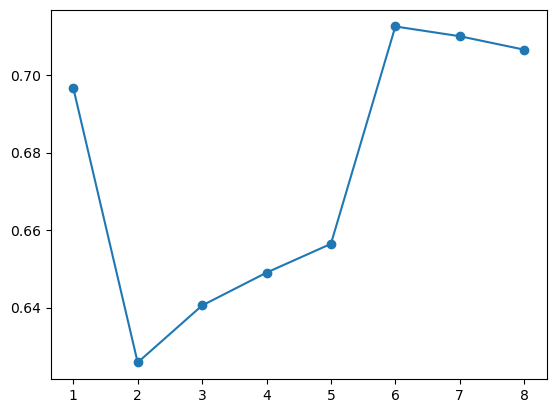

In [72]:
plt.plot(k_values, precision_scores, label='Precision', marker='o')

In [73]:
precision(YDe, YDp)

0.8

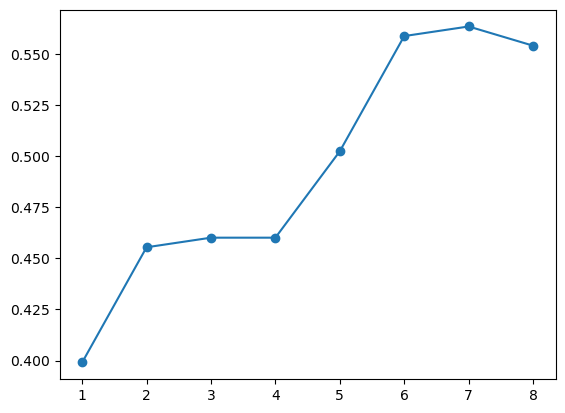

In [74]:
plt.plot(k_values, recall_scores, label='Recall', marker='o')

In [75]:
recall(YDe, YDp)

0.509090909090909

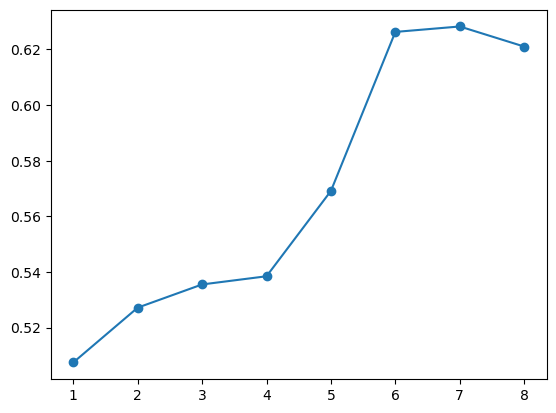

In [76]:
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')

In [77]:
f1_score(YDe, YDp)

0.6222222222222221